<a href="https://colab.research.google.com/github/MikhailKalikin/test/blob/main/npg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

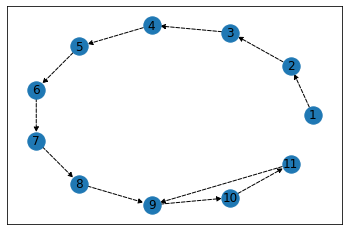

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем сетевой граф и добавляем узлы
G=nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])

# Добавляем ребра и их атрибуты
G.add_edge(1, 2, tпес=10, tвер=6, tопт=3, sk=6)
G.add_edge(2, 3, tпес=7, tвер=4, tопт=2, sk=7)
G.add_edge(3, 4, tпес=8, tвер=5, tопт=2, sk=5)
G.add_edge(4, 5, tпес=6, tвер=3, tопт=1, sk=8)
G.add_edge(5, 6, tпес=7, tвер=4, tопт=2, sk=4)
G.add_edge(6, 7, tпес=10, tвер=8, tопт=3, sk=9)
G.add_edge(7, 8, tпес=15, tвер=10, tопт=5, sk=3)
G.add_edge(8, 9, tпес=9, tвер=6, tопт=3, sk=10)
G.add_edge(9, 10, tпес=7, tвер=4, tопт=2, sk=2)
G.add_edge(10, 11, tпес=11, tвер=9, tопт=5, sk=5)
G.add_edge(11, 9, tпес=9, tвер=7, tопт=2, sk=3)

# Отрисовываем график
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, font_size=12, style='dashed')
plt.show()

t_early: 10
t_late: 10
t_opt: 10
sk: 10


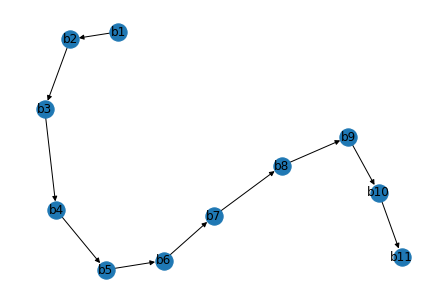

In [11]:
import networkx as nx 

G = nx.DiGraph() 

# Добавляем работы в граф
G.add_nodes_from(["b1","b2","b3","b4","b5","b6","b7","b8","b9","b10","b11"]) 

# Добавляем связи между работами
G.add_edges_from([("b1","b2"),("b2","b3"),("b3","b4"),("b4","b5"),("b5","b6"),("b6","b7"),("b7","b8"),("b8","b9"),("b9","b10"),("b10","b11")]) 

# Рассчитываем наиболее ранние и наиболее поздние сроки наступления событий
# Получаем вектор ранних сроков
t_early = nx.dag_longest_path_length(G, weight="t_early") 
# Получаем вектор поздних сроков
t_late = nx.dag_longest_path_length(G, weight="t_late") 
# Получаем вектор оптимальных сроков
t_opt = nx.dag_longest_path_length(G, weight="t_opt")

# Рассчитываем стоимость сокращения работы на один день
sk = nx.dag_longest_path_length(G, weight="sk")

# Рисуем график
nx.draw(G, with_labels=True)

# Выводим результаты
print("t_early:", t_early)
print("t_late:", t_late)
print("t_opt:", t_opt)
print("sk:", sk)

Критический путь: ['b1', 'b3', 'b5', 'b7', 'b9', 'b11']
Длина критического пути: 34


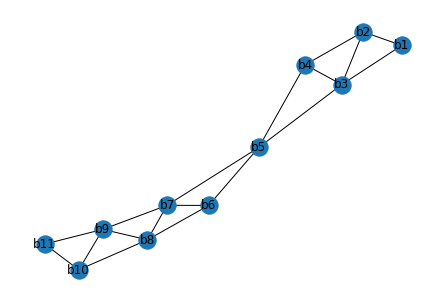

In [14]:

import networkx as nx 

# создание нового графа
G = nx.Graph() 

# добавление узлов и ребер
G.add_nodes_from(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11'])
G.add_weighted_edges_from([('b1', 'b2', 10), ('b2', 'b3', 7), ('b3', 'b4', 8), ('b4', 'b5', 6), 
('b5', 'b6', 7), ('b6', 'b7', 10), ('b7', 'b8', 15), ('b8', 'b9', 9), ('b9', 'b10', 7), 
('b10', 'b11', 11)]) 

# изменение стоимостей для критического пути
G.add_weighted_edges_from([('b1', 'b3', 6), ('b2', 'b4', 4), ('b3', 'b5', 5), ('b4', 'b5', 3), 
('b5', 'b7', 4), ('b6', 'b8', 8), ('b7', 'b9', 10), ('b8', 'b10', 6), ('b9', 'b11', 9)]) 

# нахождение критического пути
critical_path = nx.dijkstra_path(G, 'b1', 'b11', weight='weight')
t_critical = nx.dijkstra_path_length(G, 'b1', 'b11', weight='weight')

# вывод критического пути и длины пути
print("Критический путь: {}".format(critical_path)) 
print("Длина критического пути: {}".format(t_critical))
nx.draw(G, with_labels=True)


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("Start")
for i in range(1, 12):
    G.add_node("b" + str(i))
G.add_node("End")
G.add_edge("Start", "b1", weight=0)
G.add_edge("Start", "b2", weight=0)
G.add_edge("Start", "b3", weight=0)
G.add_edge("Start", "b4", weight=0)
G.add_edge("b1", "b5", weight=10)
G.add_edge("b2", "b4", weight=7)
G.add_edge("b3", "b4", weight=8)
G.add_edge("b3", "b5", weight=7)
G.add_edge("b4", "b6", weight=6)
G.add_edge("b4", "b5", weight=7)
G.add_edge("b5", "b7", weight=10)
G.add_edge("b5", "b6", weight=10)
G.add_edge("b6", "b8", weight=15)
G.add_edge("b7", "b8", weight=9)
G.add_edge("b7", "b9", weight=7)
G.add_edge("b7", "b10", weight=11)
G.add_edge("b9", "b11", weight=9)
G.add_edge("b10", "b11", weight=9)
G.add_edge("b8", "End", weight=0)
G.add_edge("b11", "End", weight=0)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=12, node_color='skyblue', font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=11, font_color='black')
plt.show()

critical_path = nx.dag_longest_path(G, weight='weight')
earliest_start_time = nx.algorithms.dag.ancestors(G, "Start")
earliest_finish_time = {}
for node in G.nodes():
    if node in earliest_start_time:
        if node == "Start":
            earliest_finish_time[node] = 0
        else:
            earliest_finish_time[node] = max([earliest_finish_time[pred] + G[pred][node]["weight"] for pred in G.predecessors(node)])
latest_finish_time = nx.algorithms.dag.descendants(G, "End")
latest_start_time = {}
for node in G.nodes():
    if node in latest_finish_time:
        if node == "End":
            latest_start_time[node] = earliest_finish_time["End"]
        else:
            latest_start_time[node] = min([latest_start_time[succ] - G[node][succ
for node in reversed(list(G.nodes())):
    if node in latest_finish_time:
        if node == "End":
            latest_start_time[node] = earliest_finish_time["End"]
        else:
            latest_start_time[node] = min([latest_start_time[succ] - G[node][succ]["weight"] for succ in G.successors(node)])
total_float = {}
free_float = {}
for node in G.nodes():
    total_float[node] = latest_start_time[node] - earliest_start_time[node]
    free_float[node] = min([latest_start_time[succ] - earliest_finish_time[node] - G[node][succ]["weight"] for succ in G.successors(node)])


SyntaxError: ignored